# Simple Moving Average Crossover Stratagy
The moving average crossover strategy is a popular trading strategy in finance that uses two or more moving averages to identify potential buy or sell signals. The basic idea behind this strategy is to identify when a short-term moving average crosses above or below a longer-term moving average, which is often seen as a signal of a trend reversal.

## Simple Moving Average
It is the average of a series of $n$ data points over a specific period of time window $k$.
$$SMA_k = \frac{1}{k}\sum_{i=n-k+1}^{n} p_i$$
where, $p_i$ is the price at $i^{th}$ observation.

For example, to calculate a 10-day SMA for a stock's closing price, you would:

* Add up the closing prices for the last 10 days.
* Divide the total by 10 to get the SMA.

## The Strategy
To implement a long only moving average crossover strategy, you would typically follow these steps:

* *Select a set of moving averages*: You need to select two or more moving averages with different time periods. For example, you could use a 50-day moving average call it `fast_ma` and a 200-day moving average call it `slow_ma`.

* Buy signal: When the `fast_ma` crosses above the `slow_ma`, it is a buy signal, indicating a potential uptrend.

* Exit signal: When the `slow_ma` crosses above the `fast_ma`, it is an exit (sell) signal, indicating a potential downtrend.

In [ ]:
#necessary library imports
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings("ignore")

#necessary imports
import pandas as pd
import seaborn as sns
import yfinance as yf

pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
#define the parameters
security = 'ASIANPAINT.NS'
start_date = '2021-10-01' #Oct 1, 2021
end_date = '2023-05-06' #May 6, 2023

In [ ]:
prices = yf.download(security, start=start_date, end=end_date)
prices.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,3248.00,3252.95,3170.00,3177.85,3151.37,1512332
2021-10-04,3202.80,3230.50,3178.00,3201.60,3174.92,921241
2021-10-05,3208.55,3260.00,3191.65,3254.75,3227.63,909337
2021-10-06,3262.00,3280.00,3200.65,3212.25,3185.48,786378
2021-10-07,3220.00,3318.00,3220.00,3290.85,3263.43,1177283


In [ ]:
close_price = prices[['Adj Close']]
#calculate the moving averages
close_price.loc[:,'fast_ma'] = close_price['Adj Close'].rolling(50).mean()
close_price.loc[:,'slow_ma'] = close_price['Adj Close'].rolling(200).mean()
close_price.dropna().head()

,Adj Close,fast_ma,slow_ma
Date,,,
2022-07-20,3002.12,2840.16,3072.74
2022-07-21,3061.68,2841.03,3072.29
2022-07-22,3062.98,2841.45,3071.73
2022-07-25,3100.48,2843.89,3071.09
2022-07-26,3104.02,2845.41,3070.69


<Axes: xlabel='Date'>

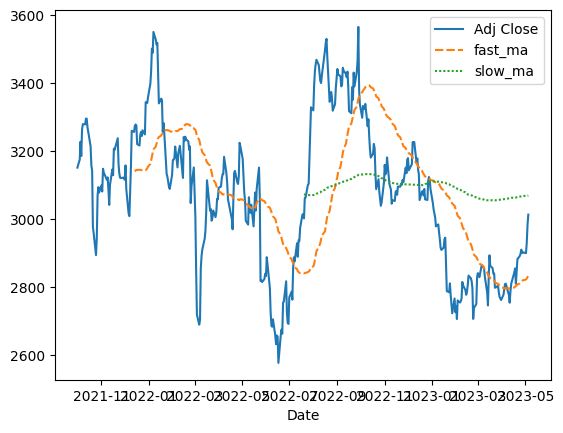

In [ ]:
sns.lineplot(data=close_price)

In [ ]:
def check_duration(df):
  start_date = df